# PCA plot of an articulation of a predicted articulatory

In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
from matplotlib import cm
import seaborn as sns
from functools import partial
import sklearn
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import ctypes
from os import makedirs
import os
from os.path import join
import shutil
from IPython import display

%matplotlib inline

In [2]:
np_load_old = partial(np.load)
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
np.random.seed(42)

In [67]:
 # load raw data
pred_param = np.load('../experiment_2/result/predict_140_8/testset.npz')['param_sets']
pred_param.shape

(81, 2, 24)

In [68]:
with open(join('../data/d_records/selected','syllable_name.txt')) as f:
    phonetic = np.array([word.strip()[0] for line in f for word in line.split(',')])
    
phonetic.shape

(81,)

In [69]:
pred_param[:,0,:].shape

(81, 24)

In [70]:
pca = PCA(n_components=3)
pca.fit(pred_param[:,0,:])
labels_pca = pca.transform(pred_param[:,0,:])
pca_data = pd.DataFrame({'phonetic': phonetic, 'PCA1': labels_pca[:,0], 'PCA2': labels_pca[:,1],'PCA3': labels_pca[:,2]})

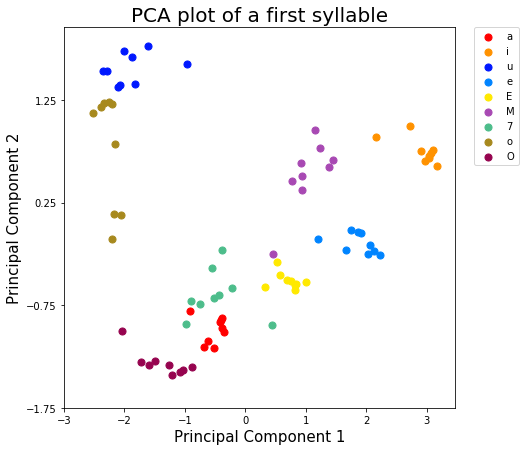

In [71]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA plot of a first syllable', fontsize = 20)
color = ['#FF0000','#FF9200','#0018FF','#0084FF','#FFE900','#A849B3','#4DBD8B','#A7891E','#96044F','#007741']

i = 0
targets = list(set(phonetic))
targets = ['a', 'i', 'u','e','E','M','7','o','O']
for target in targets:
    indicesToKeep = pca_data['phonetic'] == target
    ax.scatter(pca_data.loc[indicesToKeep, 'PCA1']
               , pca_data.loc[indicesToKeep, 'PCA2']
               , s = 50,
              color=color[i], 
              label=target)
    i += 1
ax.set_xticks(np.arange(-3, 3+0.1, 1))
ax.set_yticks(np.arange(-1.75, 1.75+0.1, 1))
ax.legend()
ax.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.savefig('pca_all_1_2.png')

In [72]:
with open(join('../data/d_records/selected','syllable_name.txt')) as f:
    phonetic = np.array([word.strip()[1] for line in f for word in line.split(',')])
    
phonetic.shape

(81,)

In [73]:
pca = PCA(n_components=3)
pca.fit(pred_param[:,1,:])
labels_pca = pca.transform(pred_param[:,1,:])
pca_data = pd.DataFrame({'phonetic': phonetic, 'PCA1': labels_pca[:,0], 'PCA2': labels_pca[:,1],'PCA3': labels_pca[:,2]})

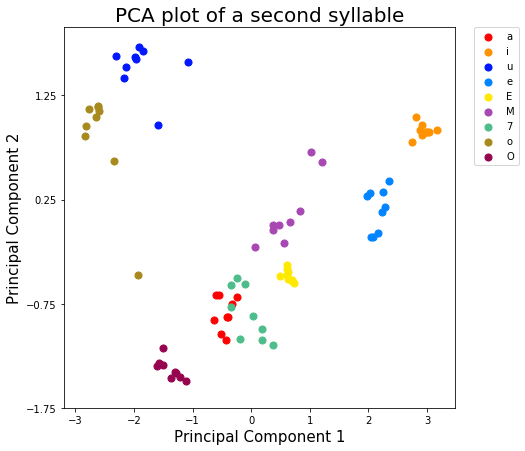

In [74]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA plot of a second syllable', fontsize = 20)
color = ['#FF0000','#FF9200','#0018FF','#0084FF','#FFE900','#A849B3','#4DBD8B','#A7891E','#96044F','#007741']

i = 0
targets = list(set(phonetic))
targets = ['a', 'i', 'u','e','E','M','7','o','O']
for target in targets:
    indicesToKeep = pca_data['phonetic'] == target
    ax.scatter(pca_data.loc[indicesToKeep, 'PCA1']
               , pca_data.loc[indicesToKeep, 'PCA2']
               , s = 50,
              color=color[i], 
              label=target)
    i += 1
ax.set_xticks(np.arange(-3, 3+0.1, 1))
ax.set_yticks(np.arange(-1.75, 1.75+0.1, 1))
ax.legend()
ax.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.savefig('pca_all_1_2.png')

In [3]:
if True: print(1)

1
